In [1]:
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
import os
import random
import math
import pandas as pd
import scipy
import numpy.ma as ma
import itertools
import community

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

In [3]:
dol_gml = nx.read_gml('dolphins.gml')
dol_txt = ldata ('dolphins.txt')
dol_gen = ldata ('dolphinsGender.txt')

In [4]:
for d in dol_gen:
    dol_gml.nodes[d[0]]["genero"]=d[1]

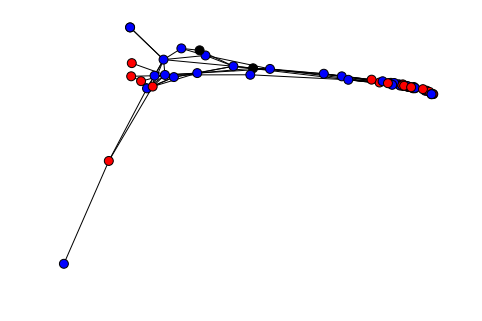

In [51]:
nx.draw_spectral(dol_gml, node_color=["blue" if genero=="m" else "red" if genero=="f" else "black" for genero in nx.get_node_attributes(dol_gml, "genero").values()], node_size = 80,with_labels=False, font_weight='bold')
plt.show ()

# EJERCICIO (1) A.

### Louvian

#### Lo que haremos con cada partición será generar diccionarios tales que la "key" sea el nombre del delfín y el "value" la comunidad a la cual pertenecen (asociada a un número)

In [26]:
louvian = community.best_partition(dol_gml)
# print(louvian)
#la funcion best_partition(G) ya me devuelve un diccionario

In [27]:
fast_greedy = nx.algorithms.community.greedy_modularity_communities(dol_gml)
fast_greedy_dict = {}
for i in range(len(fast_greedy)):
    for node in dol_gml.nodes:
        if node in fast_greedy[i]:
            fast_greedy_dict[node] = i
# print(fast_greedy)
# print(fast_greedy_dict)

#La función reedy_modularity_communities(G) me devuelve una lista donde cada 
#elemento es un frozenset; y cada frozenset es una comunidad con sus respectivos delfines
#Para ello, nos generamos el diccionario apropiado

In [38]:
betweenness = nx.algorithms.community.centrality.girvan_newman(dol_gml)
a = [node for node in betweenness]
r=len(a) #r es el numero de diccionarios que tengo, por cada diccionario tengo x comunidades (mientras mas grande r, mas grande x)
diccionarios_bet=[]
for j in range(len(a)):
    betweenness_dict = {}
    for i in range(len(a[j])):
        for node in dol_gml.nodes:
            if node in a[j][i]:
                betweenness_dict[node] = i
    diccionarios_bet.append(betweenness_dict)
# print(r) 
# print(diccionarios_bet)

#La función beetweennes es un algoritmo que genera comunidades eliminando enlaces (de mayor a menor betweenness)
#Por lo tanto me devuelve un número r de diccionarios. Creamos entonces una lista que contenga a cada diccionario

Lo que tenemos que hacer es:

a)
* Separar por clusters conformados por distintos métodos el grafo (louvian, etc).
* Asignar en el grafo colores a cada nodo en funcion del cluster al cual pertenecen. Hacer 3 gráficos.

Cosas a buscar:
1. ¿Como se obtiene el elemento mas alto de un diccionario? -- Para ver en cuantos clusters me los partio.
2. ¿Como funcionan las otras particiones, como te tiran los elementos? /Solo falta betweennes/

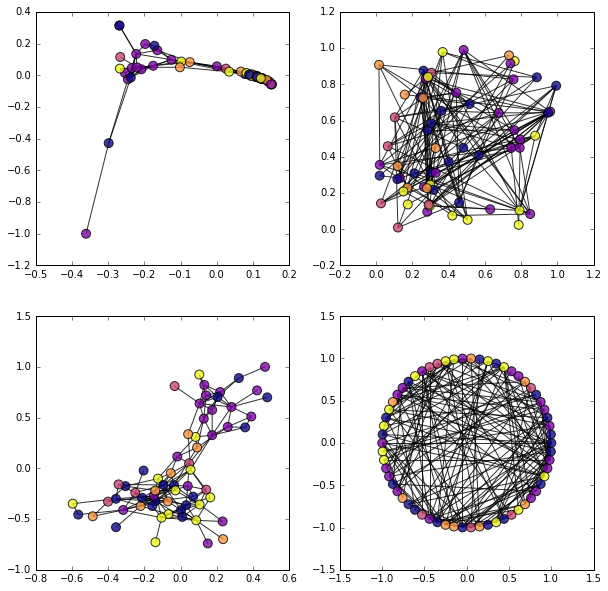

In [28]:
#LOUVAIN
plt.figure(figsize=(10,10))

layouts=['spectral','random','spring','shell','circular']

plt.subplot(2,2,1)
pos = nx.spectral_layout(dol_gml)
nx.draw_networkx(dol_gml,pos,
                       cmap=plt.get_cmap('plasma'),
                       node_color=list(louvian.values()),
                       node_size=80,
                       alpha=0.8,
                with_labels=False)

plt.subplot(2,2,2)
pos = nx.random_layout(dol_gml)
nx.draw_networkx(dol_gml,pos,
                       cmap=plt.get_cmap('plasma'),
                       node_color=list(louvian.values()),
                       node_size=80,
                       alpha=0.8,
                with_labels=False)

plt.subplot(2,2,3)
pos = nx.spring_layout(dol_gml)
nx.draw_networkx(dol_gml,pos,
                       cmap=plt.get_cmap('plasma'),
                       node_color=list(louvian.values()),
                       node_size=80,
                       alpha=0.8,
                with_labels=False)

plt.subplot(2,2,4)
pos = nx.shell_layout(dol_gml)
nx.draw_networkx(dol_gml,pos,
                       cmap=plt.get_cmap('plasma'),
                       node_color=list(louvian.values()),
                       node_size=80,
                       alpha=0.8,
                with_labels=False)
plt.show()

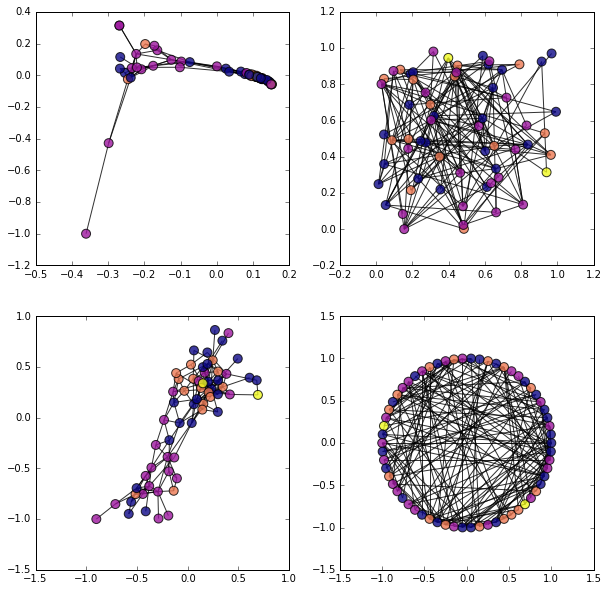

In [29]:
#FAST GREEDY
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
pos = nx.spectral_layout(dol_gml)
nx.draw_networkx(dol_gml,pos,
                       cmap=plt.get_cmap('plasma'),
                       node_color=list(fast_greedy_dict.values()),
                       node_size=80,
                       alpha=0.8,
                with_labels=False)

plt.subplot(2,2,2)
pos = nx.random_layout(dol_gml)
nx.draw_networkx(dol_gml,pos,
                       cmap=plt.get_cmap('plasma'),
                       node_color=list(fast_greedy_dict.values()),
                       node_size=80,
                       alpha=0.8,
                with_labels=False)

plt.subplot(2,2,3)
pos = nx.spring_layout(dol_gml)
nx.draw_networkx(dol_gml,pos,
                       cmap=plt.get_cmap('plasma'),
                       node_color=list(fast_greedy_dict.values()),
                       node_size=80,
                       alpha=0.8,
                with_labels=False)

plt.subplot(2,2,4)
pos = nx.shell_layout(dol_gml)
nx.draw_networkx(dol_gml,pos,
                       cmap=plt.get_cmap('plasma'),
                       node_color=list(fast_greedy_dict.values()),
                       node_size=80,
                       alpha=0.8,
                with_labels=False)
plt.show()

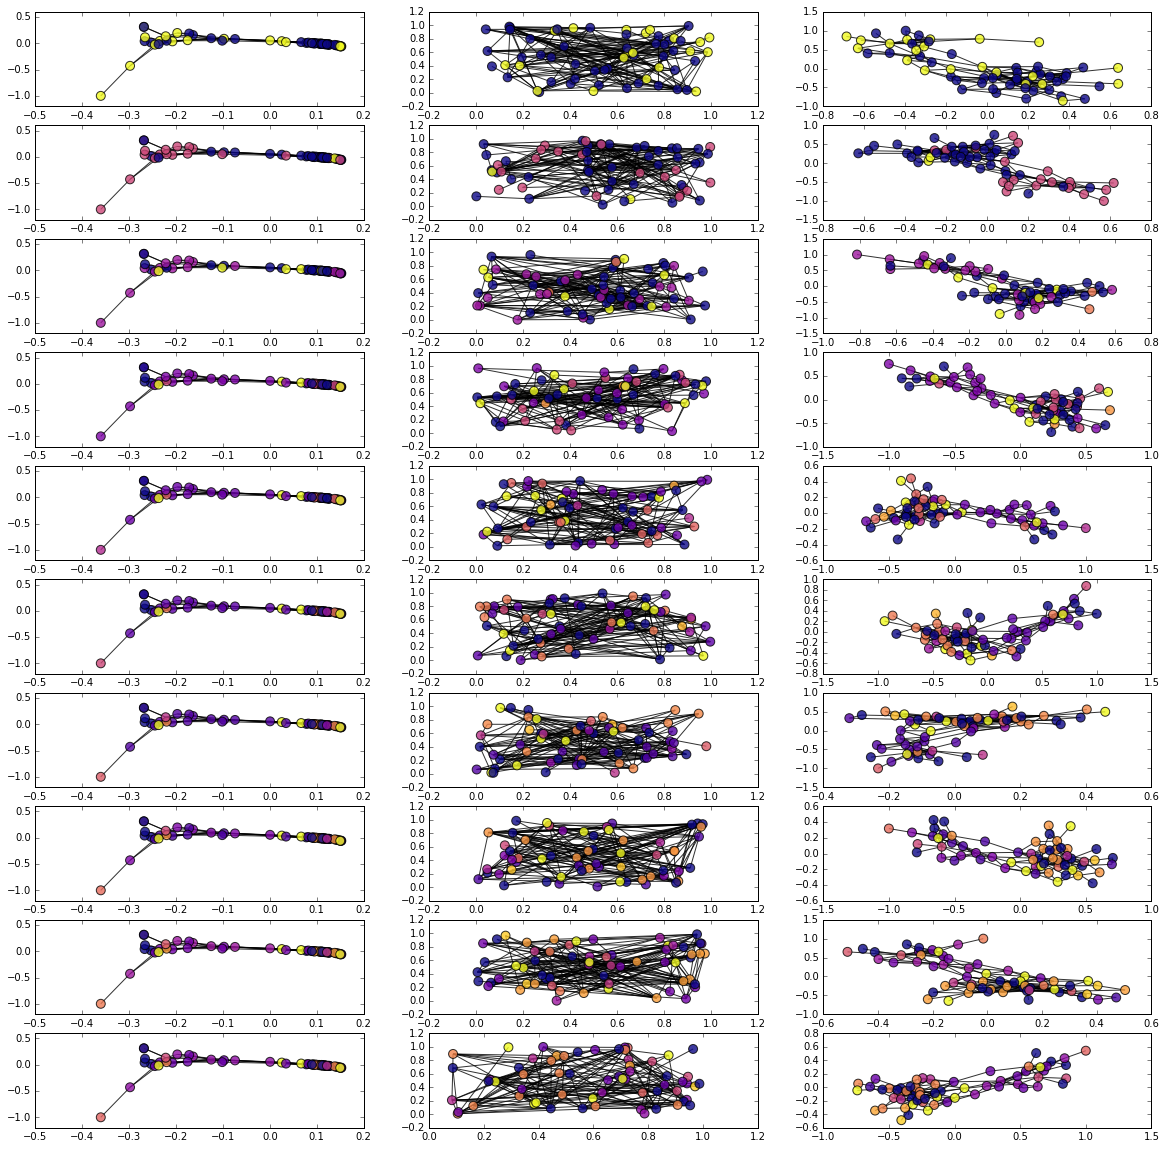

In [54]:
#BETWEENNESS
plt.figure(figsize=(20,20))
t=10 #parametro que me dice hasta cuantos diccionarios de betweenness usa
for i in range(t):
    plt.subplot(t,3,3*i+1)
    pos = nx.spectral_layout(dol_gml)
    nx.draw_networkx(dol_gml,pos,
                           cmap=plt.get_cmap('plasma'),
                           node_color=list(diccionarios_bet[i].values()),
                           node_size=80,
                           alpha=0.8,
                    with_labels=False)

    plt.subplot(t,3,3*i+2)
    pos = nx.random_layout(dol_gml)
    nx.draw_networkx(dol_gml,pos,
                           cmap=plt.get_cmap('plasma'),
                           node_color=list(diccionarios_bet[i].values()),
                           node_size=80,
                           alpha=0.8,
                    with_labels=False)

    plt.subplot(t,3,3*i+3)
    pos = nx.spring_layout(dol_gml)
    nx.draw_networkx(dol_gml,pos,
                           cmap=plt.get_cmap('plasma'),
                           node_color=list(diccionarios_bet[i].values()),
                           node_size=80,
                           alpha=0.8,
                    with_labels=False)


plt.show()

# EJERCICIO (1) B.

# Modularidad

### Louvian

In [46]:
lou_mod = community.modularity(louvian,dol_gml)
print(lou_mod)

0.5188283691309679


### Fast Greedy

In [48]:
fast_greedy_mod = community.modularity(fast_greedy_dict,dol_gml)
print(fast_greedy_mod)

0.4923262529172105


### Betweenness

In [53]:
t=10 #numero de particiones que quiero analizar
bet_mod = [] #Creo una lista que contenga a la modularidad correspondiente a cada t
for i in range(t):
    mod = community.modularity(diccionarios_bet[i],dol_gml)
    bet_mod.append(mod)
print(bet_mod)

[0.3787033740753926, 0.38149202958743716, 0.45807127882599574, 0.5193821446936434, 0.5139234998615562, 0.5175625964162811, 0.4907242593251849, 0.49380958031723426, 0.48955737510383285, 0.48528539219176453]


# Silhouette

# Preguntas a Gonza
### b) recablear las redes de forma aleatoria manteniendo la distribucion de grado y calcular para cada red recableada el fast greedy, louvian (se puede tambien infomap y betweenes pero puede llevar mucho tiempo, en el caso de beetweenness, lo que hay que hacer es calcular para cada particion que te devuelve, la modularidad y silouhette y aggarrar la particion de maxima modularidad, y esa usarla para promediar), promediarlos entre si y compararlos con los valores de las redes que ya tengo. Para eso, realizar un histograma de la distribucion y ver en que valor cae el de las redes reales; calular el p-value para ver que onda, si p-value es cercano a cero, entonces puedo decir que mi red es modular.
### c) Usar informacion mutua y probabilidad